# Librerias a importar

In [4]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import math
from tensorflow.keras.preprocessing import image

from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

2025-09-25 00:13:40.803089: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-25 00:13:41.765088: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-25 00:13:45.581711: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Creación de la nueva clase

In [5]:
class GrayScale(tf.keras.layers.Layer):
    def __init__(self, Normalized, **kwargs):
        super().__init__(**kwargs)
        self.Normalized = Normalized
        if type(self.Normalized) != bool:
            raise TypeError(f"boolean_param must be a boolean, got {type(boolean_param).__name__}")
        
        if self.Normalized == False:
            self.threshold = 130 #Para que valor de pixeles la imagen se vuelve negra sin normalizar
        else:
            self.threshold = 0.5 #Para que valor de pixeles la imagen se vuelve negra normalizado
            
    def reduction(self, input): #Se crea la base la la transformación a escala de grises
        output = tf.reduce_sum(input * [0.2125, 0.7174, 0.0721], #Se multiplican  los canales por esto valores para hacerlos grises
                              axis = -1,
                              keepdims = True)
        return output
    def blk(self, input): #Esta función regresa una imagen blanco y negro
        gray = self.reduction(input)
        outputb = tf.where(gray > self.threshold, 1.0, 0.0)
        return outputb
    def call(self, input): #Esta función regresa la escala de grises
        output = self.reduction(input)
        return output

# Comprobación de la clase

## Visualizamos la imagen original

(918, 656, 3)


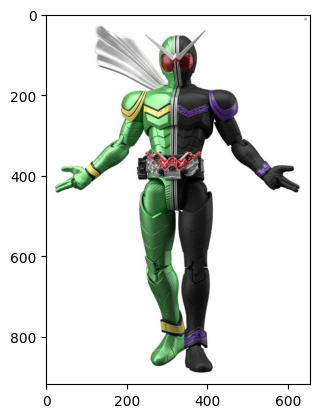

In [6]:
data_dir = r"/tf/keras_neural_network/Mis_Tests"
os.chdir(data_dir + "/KR") #Aquí va la dirección donde se encuentra la imagen
mi_imagen = "kr_W.jpg" #Nombre de la imagen 

imtest = imread(mi_imagen)
print(imtest.shape)
plt.imshow(imtest)
plt.show()

## Prueba de la función escala de grises

In [7]:
img = image.load_img(mi_imagen, target_size=(imtest.shape[0], imtest.shape[1]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Se agrega la dimensión de batch

(1, 918, 656, 1)


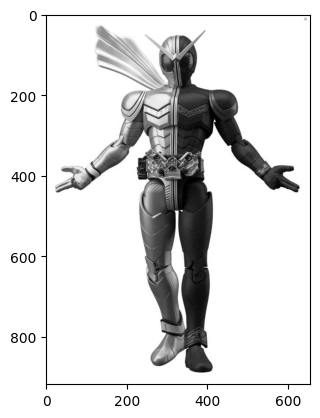

In [8]:
gray_layer = GrayScale(Normalized = False)
output = gray_layer(img_array)
print(output.shape)
output = output.numpy()[0]  # Se remueve la dimensión para visualizarla


plt.imshow(output, cmap = "gray")
plt.show()

## Prueba de la función blanco y negro

(1, 918, 656, 1)


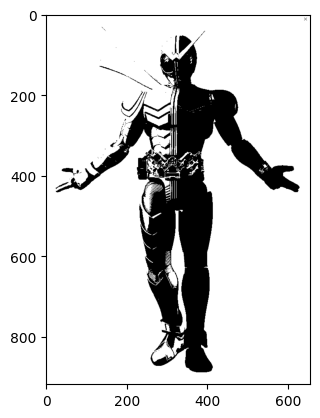

In [9]:
output = gray_layer.blk(img_array)
print(output.shape)
output = output.numpy()[0]

plt.imshow(output,cmap = "gray")
plt.show()

## Prueba de la función con normalización

(1, 918, 656, 1)


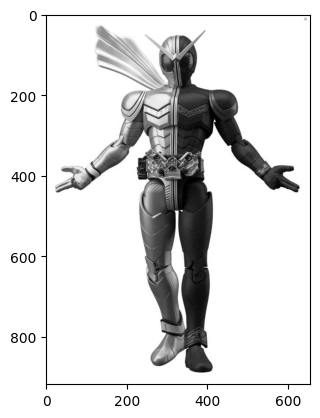

In [12]:
#Definimos las clases a usar de Keras
normalization_layer = tf.keras.layers.Rescaling(1./255) 
normalized_gray_layer = GrayScale(Normalized = True) 

output = normalization_layer(img_array) #Rescalamos para normalizar
output = normalized_gray_layer(output) #Aplicamos el filtro escala de grises
print(output.shape)
output = output.numpy()[0] 

plt.imshow(output, cmap = "gray")
plt.show()

(1, 918, 656, 1)


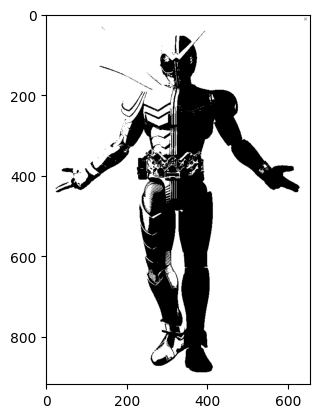

In [11]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_gray_layer = GrayScale(Normalized = True)

output = normalization_layer(img_array)
output = normalized_gray_layer.blk(output)
print(output.shape)
output = output.numpy()[0]

plt.imshow(output, cmap = "gray")
plt.show()

## Prueba de la función para un batch de imagenes

In [9]:
batch_size = 2 #definimos el tamaño del batch

#Sacamos las imagenes en forma de batches
test_images = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels = 'inferred',
    batch_size = batch_size,
)

#Normalizamos y metemos escala de grises
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_gray_layer = GrayScale(Normalized = True)

test_images = test_images.map(lambda x, y: (normalization_layer(x), y)) #Aplicamos la normalización
test_images = test_images.map(lambda x,y: (normalized_gray_layer(x), y)) #Aplicamos la escala de grises

Found 4 files belonging to 2 classes.


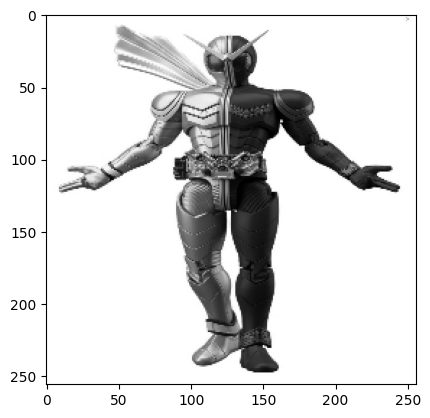

In [43]:
# Tomar un batch y graficar la primera imagen
for images, labels in test_images.take(1):
    img = images[0].numpy().squeeze()  # quitar batch y canal extra
    plt.imshow(img, cmap="gray")
    plt.show()